Note: you may need to restart the kernel to use updated packages.


22


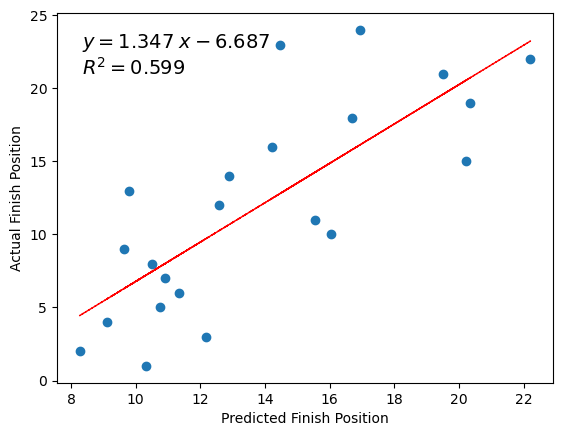

-0.5553070682251833


In [23]:
import pymongo
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

uri = "mongodb+srv://dfsprojections.4ay0gcw.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = pymongo.MongoClient(uri,
                             tls=True,
                             tlsCertificateKeyFile='C:\\Users\\brose32\\Documents\\mongo\\X509-cert-6872311124111469588.pem')
db = client.nascar
races_collection = db.races

race_doc = races_collection.find({"date": {"$gte": datetime(2024, 7, 14)}})[0]

df = pd.DataFrame.from_dict(race_doc['results'])

predict_position = []

for index, row in df.iterrows():
    predict_position.append((df.loc[index, 'start'] * 0.17683916) + (df.loc[index, 'avgDiffTrack3yr'] * -0.02883035) +
                            (df.loc[index, 'avgTrackDriverRating3yr'] * -0.07021222) + (df.loc[index, 'avgFinishTrack3yr'] * 0.10316635) +
                            (df.loc[index, 'avgDiffTrackType3yrType'] * 0.04463035) + (df.loc[index, 'avgTrackTypeDriverRating3yr'] * -0.12950424) + (df.loc[index, 'avgFinishTrackType3yr'] * -0.00846429) + 26.089638400612174)

df['predictPosition'] = predict_position
df.drop(df[(df.completeRace == False)].index, inplace=True)
df.dropna(inplace=True)
print(len(df))

x = df['predictPosition']
y = df['finish']
plt.scatter(x, y)
plt.xlabel('Predicted Finish Position')
plt.ylabel('Actual Finish Position')

z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show()

#r squared
print(r2_score(x, y))




18
         driverName  finish   laps  lapsLed  lapsLedPercentage  start  \
0       Kyle Larson     1.0  167.0      8.0           0.047904    5.0   
1     Tyler Reddick     2.0  167.0     40.0           0.239521    1.0   
2       Ryan Blaney     3.0  167.0      0.0           0.000000    7.0   
3  Christopher Bell     4.0  167.0      2.0           0.011976   18.0   
4     Bubba Wallace     5.0  167.0     26.0           0.155689   17.0   

   completeRace  rating  avgDiffTrack3yr  avgTrackDriverRating3yr  \
0          True   106.3             -0.5               105.050000   
1          True   122.6             -5.0                81.200000   
2          True   110.9             -6.0                96.733333   
3          True    92.8            -23.0                92.500000   
4          True   105.9            -10.0                85.300000   

   avgFinishTrack3yr  trackRaces avgDiffTrackType3yrType  \
0               8.75         4.0                0.416667   
1               8.00   

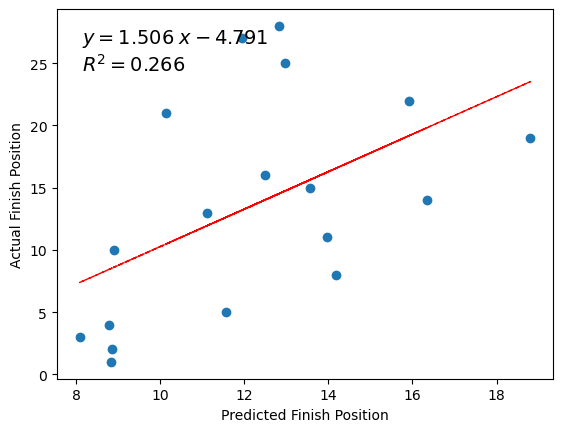

-5.732930208641601


In [26]:
race_doc = races_collection.find({"date": {"$gte": datetime(2024, 7, 21)}})[0]

df = pd.DataFrame.from_dict(race_doc['results'])
predict_position = []
df.drop(df[(df.completeRace == False)].index, inplace=True)
df.dropna(inplace=True)

for index, row in df.iterrows():
    predict_position.append((df.loc[index, 'start'] * 0.09692317) + (df.loc[index, 'avgDiffTrack3yr'] * 0.07520822) +
                            (df.loc[index, 'avgTrackDriverRating3yr'] * -0.07150186) + (df.loc[index, 'avgFinishTrack3yr'] * -0.06708669) +
                            (df.loc[index, 'avgDiffTrackType3yrType'] * -0.05949909) + (df.loc[index, 'avgTrackTypeDriverRating3yr'] * -0.01406376) + (df.loc[index, 'avgFinishTrackType3yr'] * 0.6690348) + 10.665309681605908)

df['predictPosition'] = predict_position

print(len(df))
print(df.head())
x = df['predictPosition']
y = df['finish']
plt.scatter(x, y)
plt.xlabel('Predicted Finish Position')
plt.ylabel('Actual Finish Position')

z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show()

#r squared
print(r2_score(x, y))

22
      driverName  finish   laps  lapsLed  lapsLedPercentage  start  \
0    Ryan Blaney     1.0  160.0     44.0            0.27500    8.0   
1   Denny Hamlin     2.0  160.0     31.0            0.19375    4.0   
2    Alex Bowman     3.0  160.0      0.0            0.00000    6.0   
3  William Byron     4.0  160.0      0.0            0.00000    2.0   
4    Joey Logano     5.0  160.0      3.0            0.01875   10.0   

   completeRace  rating  avgDiffTrack3yr  avgTrackDriverRating3yr  \
0          True   132.4        -5.545455                88.681818   
1          True   131.4         0.636364               111.290909   
2          True    96.5        -3.900000                80.690000   
3          True   102.0        -4.900000                96.160000   
4          True    97.0         2.400000                91.000000   

   avgFinishTrack3yr  trackRaces  avgDiffTrackType3yrType  \
0          10.454545        11.0                -2.090909   
1           8.500000        22.0       

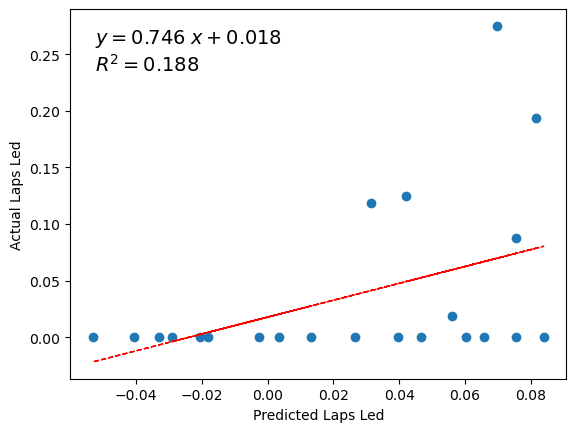

-1.5392348787441437


In [31]:
race_doc = races_collection.find({"date": {"$gte": datetime(2024, 7, 14)}})[0]

df = pd.DataFrame.from_dict(race_doc['results'])

predict_lapsled = []

for index, row in df.iterrows():
    predict_lapsled.append((df.loc[index, 'start'] * -0.00302738) + (df.loc[index, 'avgDiffTrack3yr'] * -0.00283116) +
                            (df.loc[index, 'avgTrackDriverRating3yr'] * 0.00105614) + (df.loc[index, 'avgFinishTrack3yr'] * 0.00324604) +
                            (df.loc[index, 'avgDiffTrackType3yrType'] * 0.0002606) + (df.loc[index, 'avgTrackTypeDriverRating3yr'] * 0.00127002) + (df.loc[index, 'avgFinishTrackType3yr'] * 0.00082335) - 0.17342431852325724)

df['lapsLedPrediction'] = predict_lapsled
df.drop(df[(df.completeRace == False)].index, inplace=True)
df.dropna(inplace=True)
print(len(df))
print(df.head())
x = df['lapsLedPrediction']
y = df['lapsLedPercentage']
plt.scatter(x, y)
plt.xlabel('Predicted Laps Led')
plt.ylabel('Actual Laps Led')

z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show()

#r squared
print(r2_score(x, y))


18
         driverName  finish   laps  lapsLed  lapsLedPercentage  start  \
0       Kyle Larson     1.0  167.0      8.0           0.047904    5.0   
1     Tyler Reddick     2.0  167.0     40.0           0.239521    1.0   
2       Ryan Blaney     3.0  167.0      0.0           0.000000    7.0   
3  Christopher Bell     4.0  167.0      2.0           0.011976   18.0   
4     Bubba Wallace     5.0  167.0     26.0           0.155689   17.0   

   completeRace  rating  avgDiffTrack3yr  avgTrackDriverRating3yr  \
0          True   106.3             -0.5               105.050000   
1          True   122.6             -5.0                81.200000   
2          True   110.9             -6.0                96.733333   
3          True    92.8            -23.0                92.500000   
4          True   105.9            -10.0                85.300000   

   avgFinishTrack3yr  trackRaces avgDiffTrackType3yrType  \
0               8.75         4.0                0.416667   
1               8.00   

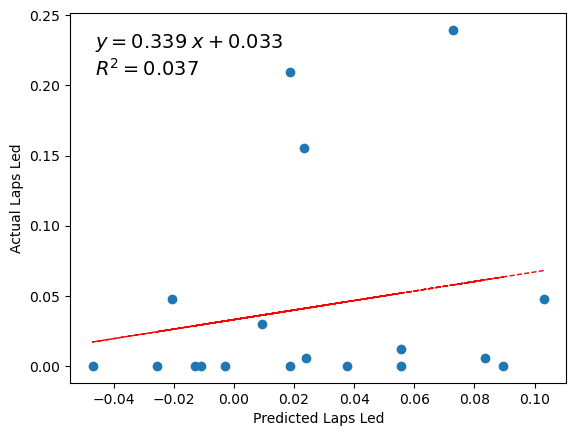

-2.60765884200166


In [33]:
race_doc = races_collection.find({"date": {"$gte": datetime(2024, 7, 21)}})[0]

df = pd.DataFrame.from_dict(race_doc['results'])

predict_lapsled = []
df.drop(df[(df.completeRace == False)].index, inplace=True)
df.dropna(inplace=True)
for index, row in df.iterrows():
    predict_lapsled.append((df.loc[index, 'start'] * -0.00297528) + (df.loc[index, 'avgDiffTrack3yr'] * -0.00051507) +
                            (df.loc[index, 'avgTrackDriverRating3yr'] * 0.00103628) + (df.loc[index, 'avgFinishTrack3yr'] * 0.00128463) +
                            (df.loc[index, 'avgDiffTrackType3yrType'] * 0.00149324) + (df.loc[index, 'avgTrackTypeDriverRating3yr'] * 0.00113418) + (df.loc[index, 'avgFinishTrackType3yr'] * -0.00176766) + -0.09329179134777348)

df['lapsLedPrediction'] = predict_lapsled
df.drop(df[(df.completeRace == False)].index, inplace=True)
df.dropna(inplace=True)
print(len(df))
print(df.head())
x = df['lapsLedPrediction']
y = df['lapsLedPercentage']
plt.scatter(x, y)
plt.xlabel('Predicted Laps Led')
plt.ylabel('Actual Laps Led')

z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show()

#r squared
print(r2_score(x, y))